# Working on firm level data

In [1]:
import pandas as pd
import nltk
import numpy as np
import requests
import pickle

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
patents_new=pd.read_csv('patent_all_en_new.csv')

In [4]:
#patents_new[patents_new.current_applt=='TOYOTA MOTOR CORP']

In [5]:
#ri[ri.violation == 'Speeding'].driver_gender.value_counts()

In [6]:
assignee=patents_new['current_applt']

In [7]:
# remove punctuation
assignee = patents_new['current_applt'].str.replace('[^\w\s]','')

In [8]:
assignee = patents_new['current_applt'].replace(".", "") 

In [9]:
assignee = patents_new['current_applt'].str.replace('\[.*?\]','')

In [10]:
assignee = patents_new['current_applt'].str.replace(",","")

In [11]:
assignee=patents_new['current_applt'].str.split()

In [12]:
assignee=patents_new['current_applt'].str.lower()

In [13]:
patents_new['assignee']=assignee

In [14]:
patents_new['assignee'].value_counts()

toyota motor corp                                                     3602
toyota jidosha kabushiki kaisha                                       3543
robert bosch gmbh                                                     2653
hyundai motor company                                                 2230
honda motor co ltd                                                    1903
nissan motor co ltd                                                   1374
honda motor co., ltd.                                                 1196
ford global technologies, llc                                         1192
nissan motor co., ltd.                                                1140
honda giken kogyo kabushiki kaisha                                     766
denso corp                                                             603
peugeot citroen automobiles sa                                         598
toyota motor corporation                                               474
mitsubishi motors corp   

# cleaning data

In [15]:
assignee=patents_new['current_applt'].str.replace('LUZ ELECTRIC FUEL ISRAEL LTD','luz electric fuel israel ltd')

In [16]:
assignee=patents_new['current_applt'].str.replace('Luz Electric Fuel Israel Ltd','Luz Electric Fuel Israel Ltd')

### Solving toyota duplication

In [17]:
patents_new['assignee']=patents_new['assignee'].str.replace('toyota motor co ltd','toyota motor corp')

In [18]:
patents_new['assignee']=patents_new['assignee'].str.replace('toyota jidosha kabushiki kaisha','toyota motor corp')

In [19]:
patents_new['assignee']=patents_new['assignee'].str.replace('toyota motor co., ltd.','toyota motor corp')

In [20]:
patents_new['assignee']=patents_new['assignee'].str.replace('toyota motor corporation','toyota motor corp')

In [21]:
patents_new['assignee'].value_counts()

toyota motor corp                                      7991
robert bosch gmbh                                      2653
hyundai motor company                                  2230
honda motor co ltd                                     1903
nissan motor co ltd                                    1374
honda motor co., ltd.                                  1196
ford global technologies, llc                          1192
nissan motor co., ltd.                                 1140
honda giken kogyo kabushiki kaisha                      766
denso corp                                              603
peugeot citroen automobiles sa                          598
mitsubishi motors corp                                  457
hitachi, ltd.                                           408
denso corporation                                       337
daimlerchrysler ag                                      335
continental automotive gmbh                             316
hitachi ltd                             

### For honda

In [22]:
patents_new['assignee']=patents_new['assignee'].str.replace('honda motor co ltd','honda motor co ltd')

In [23]:
patents_new['assignee']=patents_new['assignee'].str.replace('honda giken kogyo kabushiki kaisha','honda motor co ltd')

In [24]:
patents_new['assignee']=patents_new['assignee'].str.replace('honda motor co., ltd.','honda motor co ltd')

In [25]:
patents_new['assignee'].value_counts()

toyota motor corp                                      7991
honda motor co ltd                                     3865
robert bosch gmbh                                      2653
hyundai motor company                                  2230
nissan motor co ltd                                    1374
ford global technologies, llc                          1192
nissan motor co., ltd.                                 1140
denso corp                                              603
peugeot citroen automobiles sa                          598
mitsubishi motors corp                                  457
hitachi, ltd.                                           408
denso corporation                                       337
daimlerchrysler ag                                      335
continental automotive gmbh                             316
hitachi ltd                                             307
gm global technology operations llc                     285
siemens aktiengesellschaft              

### nissan

In [26]:
patents_new['assignee']=patents_new['assignee'].str.replace('nissan motor co., ltd.','nissan motor co ltd')

In [27]:
patents_new['assignee'].value_counts()

toyota motor corp                                      7991
honda motor co ltd                                     3865
robert bosch gmbh                                      2653
nissan motor co ltd                                    2515
hyundai motor company                                  2230
ford global technologies, llc                          1192
denso corp                                              603
peugeot citroen automobiles sa                          598
mitsubishi motors corp                                  457
hitachi, ltd.                                           408
denso corporation                                       337
daimlerchrysler ag                                      335
continental automotive gmbh                             316
hitachi ltd                                             307
gm global technology operations llc                     285
siemens aktiengesellschaft                              285
yamaha hatsudoki kabushiki kaisha       

### mitsubishi

In [28]:
patents_new['assignee']=patents_new['assignee'].str.replace('mitsubishi jidosha kogyo kabushiki kaisha','mitsubishi motors corp')

In [29]:
patents_new['assignee']=patents_new['assignee'].str.replace('mitsubishi electric corporation','mitsubishi electric corp')

In [30]:
patents_new['assignee']=patents_new['assignee'].str.replace('mitsubishi denki kabushiki kaisha','mitsubishi motors corp')

In [31]:
patents_new['assignee'].value_counts()

toyota motor corp                                      7991
honda motor co ltd                                     3865
robert bosch gmbh                                      2653
nissan motor co ltd                                    2515
hyundai motor company                                  2230
ford global technologies, llc                          1192
mitsubishi motors corp                                  875
denso corp                                              603
peugeot citroen automobiles sa                          598
mitsubishi electric corp                                474
hitachi, ltd.                                           408
denso corporation                                       337
daimlerchrysler ag                                      335
continental automotive gmbh                             316
hitachi ltd                                             307
siemens aktiengesellschaft                              285
gm global technology operations llc     

### hyundai

In [32]:
patents_new['assignee']=patents_new['assignee'].str.replace('hyundai motor company','hyundai motor co ltd')

In [33]:
patents_new['assignee']=patents_new['assignee'].str.replace('hyundai motor company','hyundai motor co ltd')

In [34]:
patents_new['assignee'].value_counts()

toyota motor corp                                      7991
honda motor co ltd                                     3865
robert bosch gmbh                                      2653
nissan motor co ltd                                    2515
hyundai motor co ltd                                   2447
ford global technologies, llc                          1192
mitsubishi motors corp                                  875
denso corp                                              603
peugeot citroen automobiles sa                          598
mitsubishi electric corp                                474
hitachi, ltd.                                           408
denso corporation                                       337
daimlerchrysler ag                                      335
continental automotive gmbh                             316
hitachi ltd                                             307
gm global technology operations llc                     285
siemens aktiengesellschaft              

In [35]:
patents_new['assignee']=patents_new['assignee'].str.replace('hitachi, ltd.','hitachi ltd')

In [36]:
patents_new['assignee'].value_counts()[:50]

toyota motor corp                                     7991
honda motor co ltd                                    3865
robert bosch gmbh                                     2653
nissan motor co ltd                                   2515
hyundai motor co ltd                                  2447
ford global technologies, llc                         1192
mitsubishi motors corp                                 875
hitachi ltd                                            715
denso corp                                             603
peugeot citroen automobiles sa                         598
mitsubishi electric corp                               474
denso corporation                                      337
daimlerchrysler ag                                     335
continental automotive gmbh                            316
siemens aktiengesellschaft                             285
gm global technology operations llc                    285
yamaha hatsudoki kabushiki kaisha                      2

### ford

In [37]:
patents_new['assignee']=patents_new['assignee'].str.replace('ford global tech llc','ford global technologies inc')

In [38]:
patents_new['assignee']=patents_new['assignee'].str.replace('ford global technologies, inc.','ford global technologies inc')

In [39]:
patents_new['assignee']=patents_new['assignee'].str.replace('ford global technologies, llc','ford global technologies inc')

In [40]:
patents_new['assignee']=patents_new['assignee'].str.replace('ford global technologies, llc','ford global technologies inc')

In [41]:
patents_new['assignee']=patents_new['assignee'].str.replace('ford global technologies llc','ford global technologies inc')

In [42]:
patents_new['assignee'].value_counts()[:50]

toyota motor corp                                     7991
honda motor co ltd                                    3865
robert bosch gmbh                                     2653
nissan motor co ltd                                   2515
hyundai motor co ltd                                  2447
ford global technologies inc                          1652
mitsubishi motors corp                                 875
hitachi ltd                                            715
denso corp                                             603
peugeot citroen automobiles sa                         598
mitsubishi electric corp                               474
denso corporation                                      337
daimlerchrysler ag                                     335
continental automotive gmbh                            316
gm global technology operations llc                    285
siemens aktiengesellschaft                             285
yamaha hatsudoki kabushiki kaisha                      2

### clearing . and ,

In [43]:
patents_new['assignee'] = patents_new['assignee'].str.replace(",","")

In [44]:
patents_new['assignee'] = patents_new['assignee'].str.replace(".","")

In [45]:
patents_new['assignee'].value_counts()[:50]

toyota motor corp                                     7997
honda motor co ltd                                    3899
robert bosch gmbh                                     2659
nissan motor co ltd                                   2596
hyundai motor co ltd                                  2532
ford global technologies inc                          1671
mitsubishi motors corp                                 899
hitachi ltd                                            759
denso corp                                             640
renault sas                                            632
peugeot citroen automobiles sa                         626
mitsubishi electric corp                               513
daimlerchrysler ag                                     338
denso corporation                                      337
continental automotive gmbh                            316
aisin aw co ltd                                        306
suzuki motor corp                                      2

### renault sas vs renault

In [46]:
patents_new['assignee']=patents_new['assignee'].str.replace('renault','renault sas')

In [47]:
patents_new['assignee']=patents_new['assignee'].str.replace('renault sas sas','renault sas')

In [48]:
patents_new['assignee'].value_counts()[:100]

toyota motor corp                              7997
honda motor co ltd                             3899
robert bosch gmbh                              2659
nissan motor co ltd                            2596
hyundai motor co ltd                           2532
ford global technologies inc                   1671
mitsubishi motors corp                          899
renault sas                                     760
hitachi ltd                                     759
denso corp                                      640
peugeot citroen automobiles sa                  626
mitsubishi electric corp                        513
daimlerchrysler ag                              338
denso corporation                               337
continental automotive gmbh                     316
aisin aw co ltd                                 306
suzuki motor corp                               299
gm global technology operations llc             291
siemens aktiengesellschaft                      285
yamaha hatsu

### Removing really lower patent ones now

In [49]:
patents_new['assignee']=patents_new['assignee'].str.replace('nissan motor company limited','nissan motor co ltd')

In [50]:
patents_new['assignee']=patents_new['assignee'].str.replace('aisin seiki kabushiki kaisha','aisin aw co ltd')

In [51]:
patents_new['assignee']=patents_new['assignee'].str.replace('hyundai motor co ltd co ltd','hyundai motor co ltd')

In [52]:
patents_new.head()

appln  appln_id  family_id  sets  direct  granted earliest_appln  \
0   WO9105114W  47158713    1239277     2       1        1    US55592190A   
1  US55592190A  51797454    1239277     2       1        1    US55592190A   
2  EP96927918A  17205496    1341188     4       0        0     JP4059995A   
3   JP4059995A  27121457    1341188     4       1        0     JP4059995A   
4   WO9602405W  30070806    1341188     4       0        0     JP4059995A   

  earliest_filing_date  publn_date         publn  \
0           1990-07-19  1993-02-18   WO9303532A1   
1           1990-07-19  1992-06-09    US5121044A   
2           1995-02-28  1998-08-12   EP0857862A1   
3           1995-02-28  1996-09-10  JPH08229330A   
4           1995-02-28  1998-03-05   WO9809059A1   

                 ...                 \
0                ...                  
1                ...                  
2                ...                  
3                ...                  
4                ...                  

                                        citing_publn  \
0                                        WO0199222A3   
1  US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...   
2  EP1167708A2\nDE10029978A1\nDE10105233A1\nEP220...   
3  KR20100103462A\nJP2011502743A\nJP2013078764A\n...   
4                                                NaN   

                                        citing_appln  \
0                                         WO0119827W   
1  US63645090A\nEP91915464A\nUS96399792A\nUS15296...   
2  EP01115227A\nDE10029978A\nDE10105233A\nEP08842...   
3  KR20107010572A\nJP2010531202A\nJP2012279486A\n...   
4                                                NaN   

                                     citing_appln_id  \
0                                           45621927   
1  52393850\n16916549\n54353461\n48212422\n457802...   
2             15814252\n12936842\n12970055\n57178895   
3  328440678\n332201837\n406999716\n378212937\n41...   
4                                                NaN   

                                    citing_family_id  num_citing_family  \
0                                           24395918                 30   
1  27071024\n1239277\n25508001\n22545199\n2636904...                 30   
2                7646156\n7646156\n7672964\n40580359                 31   
3  40580359\n40580359\n40580359\n40580359\n405803...                 31   
4                                                NaN                 31   

                       earliest_applt                       current_applt  \
0       LUZ ELECTRIC FUEL ISRAEL LTD.       LUZ ELECTRIC FUEL ISRAEL LTD.   
1      Luz Electric Fuel Israel, Ltd.      Luz Electric Fuel Israel, Ltd.   
2  SUMITOMO ELECTRIC INDUSTRIES, LTD.  SUMITOMO ELECTRIC INDUSTRIES, LTD.   
3           SUMITOMO ELECTRIC IND LTD           SUMITOMO ELECTRIC IND LTD   
4  Sumitomo Electric Industries, Ltd.  Sumitomo Electric Industries, Ltd.   

                            appln_title  \
0              ELECTRICAL ENERGY SYSTEM   
1              Electrical energy system   
2  PARTICULATE TRAP FOR A DIESEL ENGINE   
3    PARTICULATE TRAP FOR DIESEL ENGINE   
4  PARTICULATE TRAP FOR A DIESEL ENGINE   

                                         appln_abstr  \
0  An electrical energy system including an elect...   
1  An electrical energy system including an elect...   
2  An object is to provide a particulate trap for...   
3  PURPOSE: To obtain a trap by which the leakage...   
4  A particulate trap for a diesel engine designe...   

                           assignee  
0      luz electric fuel israel ltd  
1      luz electric fuel israel ltd  
2  sumitomo electric industries ltd  
3         sumitomo electric ind ltd  
4  sumitomo electric industries ltd  

[5 rows x 35 columns]

In [53]:
import pickle
patents_new.to_pickle('patent_firm_clean.pkl')

In [54]:
patent = pd.read_pickle('patent_firm_clean.pkl')

In [55]:
patent.head()

appln  appln_id  family_id  sets  direct  granted earliest_appln  \
0   WO9105114W  47158713    1239277     2       1        1    US55592190A   
1  US55592190A  51797454    1239277     2       1        1    US55592190A   
2  EP96927918A  17205496    1341188     4       0        0     JP4059995A   
3   JP4059995A  27121457    1341188     4       1        0     JP4059995A   
4   WO9602405W  30070806    1341188     4       0        0     JP4059995A   

  earliest_filing_date  publn_date         publn  \
0           1990-07-19  1993-02-18   WO9303532A1   
1           1990-07-19  1992-06-09    US5121044A   
2           1995-02-28  1998-08-12   EP0857862A1   
3           1995-02-28  1996-09-10  JPH08229330A   
4           1995-02-28  1998-03-05   WO9809059A1   

                 ...                 \
0                ...                  
1                ...                  
2                ...                  
3                ...                  
4                ...                  

                                        citing_publn  \
0                                        WO0199222A3   
1  US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...   
2  EP1167708A2\nDE10029978A1\nDE10105233A1\nEP220...   
3  KR20100103462A\nJP2011502743A\nJP2013078764A\n...   
4                                                NaN   

                                        citing_appln  \
0                                         WO0119827W   
1  US63645090A\nEP91915464A\nUS96399792A\nUS15296...   
2  EP01115227A\nDE10029978A\nDE10105233A\nEP08842...   
3  KR20107010572A\nJP2010531202A\nJP2012279486A\n...   
4                                                NaN   

                                     citing_appln_id  \
0                                           45621927   
1  52393850\n16916549\n54353461\n48212422\n457802...   
2             15814252\n12936842\n12970055\n57178895   
3  328440678\n332201837\n406999716\n378212937\n41...   
4                                                NaN   

                                    citing_family_id  num_citing_family  \
0                                           24395918                 30   
1  27071024\n1239277\n25508001\n22545199\n2636904...                 30   
2                7646156\n7646156\n7672964\n40580359                 31   
3  40580359\n40580359\n40580359\n40580359\n405803...                 31   
4                                                NaN                 31   

                       earliest_applt                       current_applt  \
0       LUZ ELECTRIC FUEL ISRAEL LTD.       LUZ ELECTRIC FUEL ISRAEL LTD.   
1      Luz Electric Fuel Israel, Ltd.      Luz Electric Fuel Israel, Ltd.   
2  SUMITOMO ELECTRIC INDUSTRIES, LTD.  SUMITOMO ELECTRIC INDUSTRIES, LTD.   
3           SUMITOMO ELECTRIC IND LTD           SUMITOMO ELECTRIC IND LTD   
4  Sumitomo Electric Industries, Ltd.  Sumitomo Electric Industries, Ltd.   

                            appln_title  \
0              ELECTRICAL ENERGY SYSTEM   
1              Electrical energy system   
2  PARTICULATE TRAP FOR A DIESEL ENGINE   
3    PARTICULATE TRAP FOR DIESEL ENGINE   
4  PARTICULATE TRAP FOR A DIESEL ENGINE   

                                         appln_abstr  \
0  An electrical energy system including an elect...   
1  An electrical energy system including an elect...   
2  An object is to provide a particulate trap for...   
3  PURPOSE: To obtain a trap by which the leakage...   
4  A particulate trap for a diesel engine designe...   

                           assignee  
0      luz electric fuel israel ltd  
1      luz electric fuel israel ltd  
2  sumitomo electric industries ltd  
3         sumitomo electric ind ltd  
4  sumitomo electric industries ltd  

[5 rows x 35 columns]

In [56]:
patent['assignee'] = patent['assignee'].str.replace(",","")

In [57]:
patent['assignee'] = patent['assignee'].str.replace(".","")

In [58]:
patent['assignee'].value_counts()[:100]

toyota motor corp                              7997
honda motor co ltd                             3899
nissan motor co ltd                            2670
robert bosch gmbh                              2659
hyundai motor co ltd                           2597
ford global technologies inc                   1671
mitsubishi motors corp                          899
renault sas                                     760
hitachi ltd                                     759
denso corp                                      640
peugeot citroen automobiles sa                  626
mitsubishi electric corp                        513
aisin aw co ltd                                 365
daimlerchrysler ag                              338
denso corporation                               337
continental automotive gmbh                     316
suzuki motor corp                               299
gm global technology operations llc             291
siemens aktiengesellschaft                      285
yamaha hatsu

In [59]:
p=patent

In [60]:
p.loc[p.assignee.str.contains('toyota jidosha',na=False)]

appln   appln_id  family_id  sets  direct  granted  \
5213       DE19701355A   13457689   11646668     4       1        0   
5352        JP1663492A   25858027   11921796     4       1        1   
5404       DE19901470A   13550451   12028753    12       1        1   
5437       DE19505726A   13381314   12080783     8       1        1   
5457        JP2394992A   26243358   12124804     4       1        1   
5625        JP3551791A   26853012   12443949     4       1        1   
5667        JP3866991A   27019511   12531682     4       1        1   
5739        JP4382791A   27291712   12674590     4       1        1   
5811       DE19708994A   13463330   12828575     4       0        0   
5833       DE19906601A   13554565   12889185    12       1        0   
5889        JP5728794A   28002445   13051339     4       1        1   
5917        JP6025493A   28159927   13136854     2       1        1   
6214       DE19814679A   13512474   13809949     4       0        1   
6299        JP9161193A   29830381   14031371     4       1        1   
6340        JP9392790A   29955143   14096070     4       1        1   
6356        DE4413675A   11292645   14115076     4       0        1   
6414        JP9916591A   30251281   14240040    10       1        1   
6505       JP10566993A   30583414   14413855     4       1        1   
6661       JP11730495A   31154954   14708445     4       1        1   
6737       JP12266693A   31412096   14841636     4       1        1   
6761       JP12380291A   31465709   14869682     4       1        1   
6843       JP13000791A   31755136   15023846     4       1        1   
6855       JP13117692A   31808482   15051787     4       1        1   
6857       JP13122591A   31810644   15052958     4       1        1   
7087       JP14446490A   32393030   15362884     4       1        1   
7089       JP14446590A   32393072   15362908     4       1        1   
7143       DE19724681A   13474934   15476299     8       1        1   
7163       JP15130396A   32677220   15515731     4       0        1   
7207       JP15431092A   32795701   15581324     2       1        1   
7228       TW82104201A  476448027   15602842     4       0        1   
...                ...        ...        ...   ...     ...      ...   
51576  CN201180006331A  413739423   48429106     8       1        1   
52409  CN201380029016A  437477891   48672664     4       0        1   
53211  CN201280069801A  423335494   48983690     8       1        1   
53288  CN201280070135A  423536204   49005229     8       1        1   
53440  CN201280070769A  423335496   49081836     8       1        1   
53446  CN201280070392A  423135852   49081883     8       1        1   
53521  CN201280071211A  423791690   49116119     4       0        1   
53538  CN201380012530A  423536160   49116602     2       1        1   
53764  CN201280071558A  424786020   49222034     8       1        1   
53774  CN201280071587A  424785882   49222038     8       1        1   
53866  CN201280071761A  424786042   49258467     8       1        1   
53885  CN201280070808A  423336503   49258514     4       1        1   
54128  CN201380034126A  437820058   49378500     8       0        1   
54309  CN201280072625A  425440964   49482425     1       1        1   
54554  CN201280073060A  425440960   49550312    10       1        1   
54747  CN201280073283A  425860411   49623309     8       1        1   
55007  CN201280074078A  437820020   49768264     4       1        1   
55017  CN201280074067A  437819118   49768273     8       1        1   
55307  CN201280074517A  439590366   49881506     8       1        1   
55314  CN201280074432A  439591032   49881511     4       0        1   
55409  CN201280074599A  439591052   49915525     4       1        1   
55498  CN201280074712A  439414604   49948410     8       1        1   
55501  CN201280074729A  439414672   49948411     8       1        1   
55535  CN201380037658A  438869493   49956234     4       1        1   
55546  CN201380046187A  440372083   49958

In [61]:
len(p.loc[p.assignee.str.contains('toyota',na=False)])

8359

In [62]:
len(p.loc[p.assignee.str.contains('toyota jidosha',na=False)])

153

### Coming back to cleaning more

In [63]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kk toyota aichi jp','toyota motor corp')

In [64]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kk','toyota motor corp')

In [65]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kabushiki kaisya','toyota motor corp')

In [66]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kakushiki kaisha','toyota motor corp')

In [67]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kabushikikaisha','toyota motor corp')

In [68]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kabushikikaisha','toyota motor corp')

In [69]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kubishiki kaisha','toyota motor corp')

In [70]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kanushiki kaisha','toyota motor corp')

In [71]:
p['assignee']=p['assignee'].str.replace('toyota jidosha kabsuhiki kaisha','toyota motor corp')

In [72]:
p['assignee']=p['assignee'].str.replace("toyota industries corp","nissan motor co ltd")

In [73]:
p['assignee']=p['assignee'].str.replace('nissan motor','nissan motor co ltd')

In [74]:
p['assignee']=p['assignee'].str.replace("nissan motor co ltd co ltd","nissan motor co ltd")

In [75]:
p['assignee']=p['assignee'].str.replace("zhengzhou nissan automobile co ltd","nissan motor co ltd")

In [76]:
p['assignee']=p['assignee'].str.replace("nissan diesel motor co ltd","nissan motor co ltd")

In [77]:
p['assignee']=p['assignee'].str.replace("suzuki motor corporation","suzuki motor corp")

In [78]:
p['assignee']=p['assignee'].str.replace("honda giken kogyo kk","honda motor co ltd")

In [79]:
p['assignee']=p['assignee'].str.replace("honda motor coltd","honda motor co ltd")

In [80]:
p['assignee']=p['assignee'].str.replace("volkswagen aktiengesellschaft","volkswagen group")

In [81]:
p['assignee']=p['assignee'].str.replace("volkswagen ag","volkswagen group")

In [82]:
p['assignee']=p['assignee'].str.replace("volkswagen ag","volkswagen group")

In [83]:
p['assignee']=p['assignee'].str.replace("peugeot citroen automobiles sa","peugeot citroen automobiles")

In [84]:
p['assignee']=p['assignee'].str.replace("peugeot citroën automobiles sa","peugeot citroen automobiles")

In [85]:
p['assignee']=p['assignee'].str.replace("peugeot citroën automobiles sa","peugeot citroen automobiles")

In [86]:
p['assignee']=p['assignee'].str.replace("robert bosch gmbh","bosch corp")

In [87]:
p['assignee']=p['assignee'].str.replace("bosch gmbh robert","bosch corp")

In [88]:
p['assignee']=p['assignee'].str.replace("renault sas societe par actions simplifiee","renault sas")

In [89]:
p['assignee']=p['assignee'].str.replace("isuzu motors limited","isuzu motors ltd")

In [90]:
p['assignee']=p['assignee'].str.replace("aisin seiki co ltd","aisin aw co ltd")

In [91]:
p['assignee']=p['assignee'].str.replace("denso corporation","denso corp")

In [92]:
p['assignee']=p['assignee'].str.replace("nippondenso co ltd","denso corp")

In [93]:
p['assignee']=p['assignee'].str.replace("bayerische motoren werke aktiengesellschaft","bmw ag")

In [94]:
p['assignee']=p['assignee'].str.replace("bayerische motoren werke (bmw) ag","bmw ag")

In [95]:
p['assignee']=p['assignee'].str.replace("BMW AG","bmw ag")

In [96]:
p.loc[p.assignee.str.contains('bmw',na=False)]

appln   appln_id  family_id  sets  direct  granted  \
333        EP90124706A   16827458    6401764     4       1        1   
667         DE4223782A   11230847    6463602     4       1        1   
706        EP93112017A   16987950    6468829     4       1        1   
807        EP93116401A   16991809    6483087     4       1        1   
826        EP94101610A   17032605    6485134     4       1        1   
905        EP94111958A   17041729    6495553     4       1        1   
956        EP94115852A   17045189    6501834     4       1        1   
1086       EP95107227A   17094267    6521500     4       1        1   
1255       EP01101851A     216448    7630187     4       1        1   
1321       EP01102654A   15803952    7634961     4       0        1   
1323       US80943701A   53580089    7634961     4       0        1   
1325        WO0101616W   15605205    7634962     4       1        1   
1380       EP01108706A   15808886    7640385     4       0        1   
1382       US84466301A   53773507    7640385     4       0        1   
1475        WO0108215W   15611660    7650248     4       1        0   
1476        US8911702A   47113223    7650248     4       1        1   
1657       EP01124030A   15821091    7666117     4       1        1   
1677        WO0113313W   15616669    7667567     1       0        1   
1678       US46047603A   51060796    7667567     1       0        0   
1738       DE10109093A   12972949    7675455     8       1        1   
1754        WO0202260W   15620932    7677900     4       1        1   
1755       US66247903A   52583295    7677900     4       1        1   
1826        WO0203707W   15622354    7683585     1       1        1   
1962       EP02015275A   15910834    7695636     1       1        1   
1964       US18807702A   48502798    7695636     5       1        1   
2131       US84903304A   53797423    7712696     4       1        1   
2433       EP97102393A   17219356    7790054     4       1        1   
2753       EP98105201A   17295046    7829556     4       1        1   
2771       EP98106397A   17296064    7830645     4       1        1   
2851       EP98112649A   17301419    7839283     4       0        1   
...                ...        ...        ...   ...     ...      ...   
58205    WO2014068298W  421285751   51417288     1       1        0   
58206  CN201480047719A  451471673   51417288     1       1        1   
58207  US201615070087A  457994497   51417288     1       1        0   
58371    WO2014069048W  421604988   51492345     2       1        0   
58372  CN201480053370A  452158820   51492345     2       1        1   
58373  US201615086157A  458699590   51492345     2       1        0   
58742    WO2014071462W  422495896   51662121     1       1        0   
58743  US201615141192A  467722382   51662121     1       1        0   
58744  CN201480059185A  469803013   51662121     2       1        1   
59123    WO2014073050W  423086040   51868197     4       1        0   
59125  US201615090647A  458700094   51868197     4       0        1   
59983    WO2015050919W  425595514   52354993     4       1        0   
59984  CN201580002848A  458465583   52354993     4       1        0   
59985  US201615228637A  473685096   52354993     4       0        0   
60378  CN201410486594A  439358667   52623550     8       1        1   
61300  US201414539186A  440483724   53171929     4       1        1   
61301  CN201410645975A  440874411   53171929     4       1        1   
61778    WO2015063078W  441071439   53483785     2       1        0   
61780  US201615333387A  475467692   53483785     2       1        0   
61931  US201514612354A  443249963   53547038     4       1        1   
61932  CN201510057333A  443180269   53547077     8       1        0   
61933  US201514613908A  443247459   53547077     8       1        1   
62475  CN201510089173A  444059105   53943372     8       1        0   
62476  US201514635171A  444209250   53943372     8       1        1   
63077  US201514708670A  445918607   54336

In [97]:
p['assignee'].value_counts()[:60]

toyota motor corp                                     8125
honda motor co ltd                                    3977
nissan motor co ltd                                   2885
bosch corp                                            2770
hyundai motor co ltd                                  2597
ford global technologies inc                          1671
denso corp                                            1097
mitsubishi motors corp                                 899
renault sas                                            859
hitachi ltd                                            759
peugeot citroen automobiles                            688
suzuki motor corp                                      528
mitsubishi electric corp                               513
aisin aw co ltd                                        458
volkswagen group                                       375
daimlerchrysler ag                                     338
continental automotive gmbh                            3

In [98]:
p.to_pickle('patent_firm_full_clean.pkl')

In [99]:
total_patents=p['assignee'].value_counts()

In [100]:
df_assigne= pd.DataFrame(data=total_patents)
df_assigne.head()

assignee
toyota motor corp         8125
honda motor co ltd        3977
nissan motor co ltd       2885
bosch corp                2770
hyundai motor co ltd      2597

In [101]:
df_assigne['Commulative']=p['assignee'].value_counts(normalize=True)
df_assigne.head(20)

assignee  Commulative
toyota motor corp                        8125     0.119037
honda motor co ltd                       3977     0.058266
nissan motor co ltd                      2885     0.042267
bosch corp                               2770     0.040583
hyundai motor co ltd                     2597     0.038048
ford global technologies inc             1671     0.024481
denso corp                               1097     0.016072
mitsubishi motors corp                    899     0.013171
renault sas                               859     0.012585
hitachi ltd                               759     0.011120
peugeot citroen automobiles               688     0.010080
suzuki motor corp                         528     0.007736
mitsubishi electric corp                  513     0.007516
aisin aw co ltd                           458     0.006710
volkswagen group                          375     0.005494
daimlerchrysler ag                        338     0.004952
continental automotive gmbh               316     0.004630
isuzu motors ltd                          300     0.004395
gm global technology operations llc       291     0.004263
siemens aktiengesellschaft                285     0.004175

In [102]:
df_assigne=df_assigne.rename(index=str, columns={" ": "Assigne", "current_applt": "# of patents"})
df_assigne.head(20)

assignee  Commulative
toyota motor corp                        8125     0.119037
honda motor co ltd                       3977     0.058266
nissan motor co ltd                      2885     0.042267
bosch corp                               2770     0.040583
hyundai motor co ltd                     2597     0.038048
ford global technologies inc             1671     0.024481
denso corp                               1097     0.016072
mitsubishi motors corp                    899     0.013171
renault sas                               859     0.012585
hitachi ltd                               759     0.011120
peugeot citroen automobiles               688     0.010080
suzuki motor corp                         528     0.007736
mitsubishi electric corp                  513     0.007516
aisin aw co ltd                           458     0.006710
volkswagen group                          375     0.005494
daimlerchrysler ag                        338     0.004952
continental automotive gmbh               316     0.004630
isuzu motors ltd                          300     0.004395
gm global technology operations llc       291     0.004263
siemens aktiengesellschaft                285     0.004175

### Working with original uncleaned firm data

In [103]:
org_patents=p['current_applt'].value_counts()
org_assigne= pd.DataFrame(data=org_patents)
org_assigne.head(20)

current_applt
TOYOTA MOTOR CORP                            3602
Toyota Jidosha Kabushiki Kaisha              2992
Robert Bosch GmbH                            2508
Hyundai Motor Company                        2228
HONDA MOTOR CO LTD                           1903
NISSAN MOTOR CO LTD                          1374
Ford Global Technologies, LLC                1190
Nissan Motor Co., Ltd.                        818
Honda Motor Co., Ltd.                         782
Honda Giken Kogyo Kabushiki Kaisha            611
DENSO CORP                                    603
Peugeot Citroen Automobiles SA                595
TOYOTA JIDOSHA KABUSHIKI KAISHA               551
Toyota Motor Corporation                      474
MITSUBISHI MOTORS CORP                        457
HONDA MOTOR CO., LTD.                         407
Hitachi, Ltd.                                 351
DaimlerChrysler AG                            335
NISSAN MOTOR CO., LTD.                        322
TOYOTA MOTOR CO., LTD.                        312

In [104]:
org_assigne['Commulative']=p['current_applt'].value_counts(normalize=True)
org_assigne.head(20)

current_applt  Commulative
TOYOTA MOTOR CORP                            3602     0.052772
Toyota Jidosha Kabushiki Kaisha              2992     0.043835
Robert Bosch GmbH                            2508     0.036744
Hyundai Motor Company                        2228     0.032642
HONDA MOTOR CO LTD                           1903     0.027880
NISSAN MOTOR CO LTD                          1374     0.020130
Ford Global Technologies, LLC                1190     0.017434
Nissan Motor Co., Ltd.                        818     0.011984
Honda Motor Co., Ltd.                         782     0.011457
Honda Giken Kogyo Kabushiki Kaisha            611     0.008952
DENSO CORP                                    603     0.008834
Peugeot Citroen Automobiles SA                595     0.008717
TOYOTA JIDOSHA KABUSHIKI KAISHA               551     0.008073
Toyota Motor Corporation                      474     0.006944
MITSUBISHI MOTORS CORP                        457     0.006695
HONDA MOTOR CO., LTD.                         407     0.005963
Hitachi, Ltd.                                 351     0.005142
DaimlerChrysler AG                            335     0.004908
NISSAN MOTOR CO., LTD.                        322     0.004718
TOYOTA MOTOR CO., LTD.                        312     0.004571

# Distribution of the patent applications over application years
Fig 3

In [106]:
filling_date= patent.earliest_filing_date
patent['application_date']= pd.to_datetime(filling_date)

In [107]:
patent.groupby(patent.application_date.dt.year).granted.size()

application_date
1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
2018       2
Name: granted, dtype: int64

In [110]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
dist=patent.groupby(patent.application_date.dt.year).granted.count()

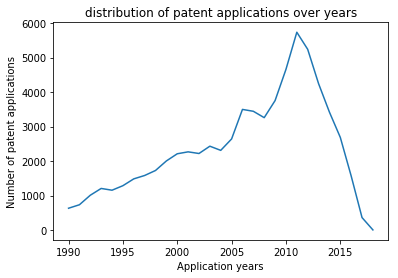

In [114]:
dist.plot()
plt.xlabel('Application years')
plt.ylabel('Number of patent applications')
plt.title('distribution of patent applications over years')
#plt.legend()
plt.show()